In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/SALES.csv')

print("Dataset_Info : \n",df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset_Info : 
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderda

BASIC ANALYSIS

In [6]:
print("Missing_Values : \n",df.isnull().sum())

Missing_Values : 
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [7]:
print("Statistics_Summary : \n ",df.describe())

Statistics_Summary : 
              Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [8]:
print(df.columns)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [9]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

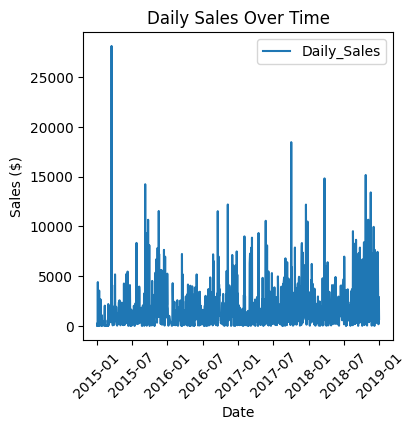

In [10]:
plt.figure(figsize=(4, 4))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label = "Daily_Sales")
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.title('Daily Sales Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

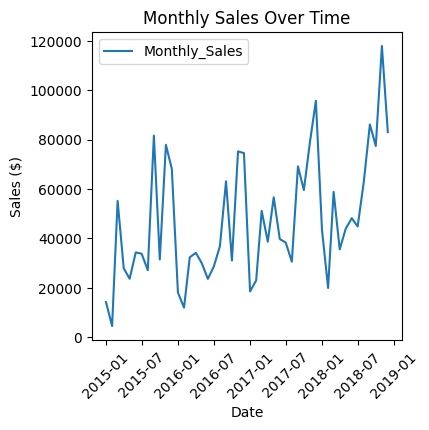

In [11]:
plt.figure(figsize=(4,4))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label = "Monthly_Sales")
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.title('Monthly Sales Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

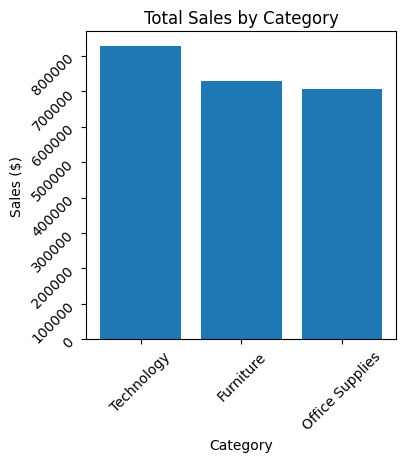

In [12]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)
plt.figure(figsize = (4,4))
plt.bar(x = category_sales.index, height = category_sales.values)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

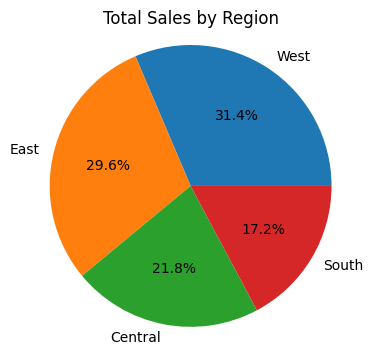

In [13]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending = False)
plt.figure(figsize = (4,4))
plt.pie(region_sales.values, labels = region_sales.index, autopct = '%1.1f%%')
plt.title('Total Sales by Region')
plt.axis('equal')
plt.show()

SECOND LEVEL OF ANALYSIS

In [14]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending = False)
print("Sales By Region :\n",sales_by_region)
total_sales = df['Sales'].sum()
sales_by_region_percent = (sales_by_region / total_sales * 100).round(2)
print(sales_by_region_percent)

Sales By Region :
 Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64
Region
West       31.40
East       29.60
Central    21.78
South      17.21
Name: Sales, dtype: float64


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

le = LabelEncoder()
for col in ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name'] :
  df[col +'_encoded'] = le.fit_transform(df[col])

features = ['Order ID_encoded', 'Ship Mode_encoded', 'Customer ID_encoded', 'Customer Name_encoded', 'Segment_encoded', 'Country_encoded', 'City_encoded', 'State_encoded', 'Region_encoded', 'Product ID_encoded', 'Category_encoded', 'Sub-Category_encoded', 'Product Name_encoded']
target = 'Sales'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
print("Linear Regression Model MSE:", lr_mse)
print("Linear Regression Model RMSE:", lr_rmse)

lr_coeffs = pd.Series(lr_model.coef_, index=features)
print("\nLinear Regression Results:")
print(f"RMSE: ${lr_rmse:.2f}")
print("Coefficients:\n", lr_coeffs)

Linear Regression Model MSE: 660513.9824097056
Linear Regression Model RMSE: 812.7201132060814

Linear Regression Results:
RMSE: $812.72
Coefficients:
 Order ID_encoded        -3.124540e-03
Ship Mode_encoded       -2.143210e+00
Customer ID_encoded      4.667806e-04
Customer Name_encoded    3.856533e-02
Segment_encoded          2.149670e+00
Country_encoded          7.007728e-13
City_encoded             4.897427e-02
State_encoded            5.960730e-01
Region_encoded           3.911591e+00
Product ID_encoded      -2.252056e-01
Category_encoded         2.073539e+02
Sub-Category_encoded     1.704372e+01
Product Name_encoded    -3.967552e-02
dtype: float64


In [18]:
#Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest Regressor Model MSE :", rf_mse)
print("Random Forest Regressor model RMSE :", rf_rmse)

rf_feature_importances = pd.Series(rf_model.feature_importances_, index=features)
print("\nRandom Forest Regressor Results:")
print(f"RMSE: ${rf_rmse:.2f}")
print("Feature Importances:\n", rf_feature_importances)

Random Forest Regressor Model MSE : 471373.6686964586
Random Forest Regressor model RMSE : 686.5665799443333

Random Forest Regressor Results:
RMSE: $686.57
Feature Importances:
 Order ID_encoded         0.086329
Ship Mode_encoded        0.013794
Customer ID_encoded      0.089659
Customer Name_encoded    0.066793
Segment_encoded          0.015270
Country_encoded          0.000000
City_encoded             0.069362
State_encoded            0.041685
Region_encoded           0.016329
Product ID_encoded       0.375752
Category_encoded         0.000671
Sub-Category_encoded     0.059150
Product Name_encoded     0.165207
dtype: float64


In [19]:
#Comparison
models = ['Linear Regression', 'Random Forest Regressor']
mse_values = [lr_mse, rf_mse]
rmse_values = [lr_rmse, rf_rmse]
print("Model Comparison:")
for model, mse, rmse in zip(models, mse_values, rmse_values):
    print(f"{model} - MSE: {mse:.2f}, RMSE: ${rmse:.2f}")

comparison = pd.DataFrame({'Model': models, 'MSE': mse_values, 'RMSE': rmse_values})
print("\nComparison Table:")
print(comparison)

comparison = pd.DataFrame({'Actual': y_test, 'LR_Predicted': lr_pred, 'RF_Predicted': rf_pred})
print("\nSample Predictions (First 5):\n", comparison.head(10))

Model Comparison:
Linear Regression - MSE: 660513.98, RMSE: $812.72
Random Forest Regressor - MSE: 471373.67, RMSE: $686.57

Comparison Table:
                     Model            MSE        RMSE
0        Linear Regression  660513.982410  812.720113
1  Random Forest Regressor  471373.668696  686.566580

Sample Predictions (First 5):
        Actual  LR_Predicted  RF_Predicted
532    47.940    168.059917     157.14884
872    11.360    269.320928      38.85846
1149   10.950    330.627592     163.37559
2287   17.480    230.223458      70.67400
4038   21.120    228.008187      38.82228
1726   88.832    242.711902     140.57674
4989    6.672    192.268029      15.52478
4228   22.480    262.462793     138.25694
6664  251.580    221.204495      86.37744
7598   38.256    273.421927      80.23834


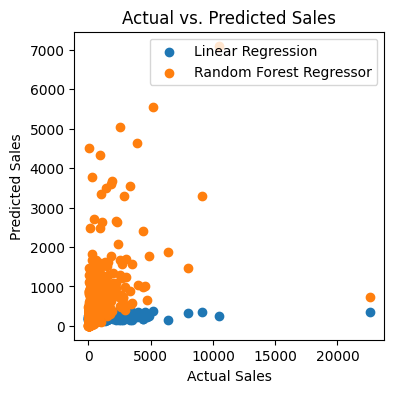

In [23]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, lr_pred, label='Linear Regression')
plt.scatter(y_test, rf_pred, label='Random Forest Regressor')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()